We start by importing the required libraries

In [1]:
import numpy as np 
import math
import matplotlib.pyplot as plt
import pandas as pd

We will be using a finite difference method to approximate the BVP 


$$y'' +\frac{π^{2}}{3}y = 0$$
<center> with $$ y(0)=1.17, y(1) =10 $$
    
in the interval [0,1]. We will chose have N+1 points
The boundary conditions impose
$$x_{0}=0, x_{N}=1; y_{0}=1.17,y_{N}=10$$
    
To solve this BVP, we will convert the above BVP into a system difference equation which can be put into matrix form Ay=b. 
    
<br>
To construct matrix A, we
Use the centred second order finite difference approximation for $y''$ at point $x_{i}$
$$ y''(x_{i})= \frac{y(x_{i+1}) -2y(x_{i}) + y(x_{i-1})}{h^{2}}+O(h^{2}) $$
    
Thus, substituting into $y'' +\frac{π^{2}}{3}y = 0$, we have
    $$  \frac{y_{i+1} -2y_{i} + y_{i-1}}{h^{2}}+ \frac{π^{2}}{3} y_{i}=0$$

    For i=1,2,...,N-1
    
Factorizing this equation, we get
    $$  (\frac{π^{2}}{3} - \frac{2}{h^{2}}) y_{i}+ \frac{1}{h^{2}}y_{i-1}+ \frac{1}{h^{2}} y_{i+1}=0$$
   
    
<br>
    Thus, we find linear equations for N-1 unknowns: <br>
    
<br>
    For n=1<center> $  (\frac{π^{2}}{3} - \frac{2}{h^{2}}) y_{1}+ \frac{1}{h^{2}} y_{2}= \frac{-1.17}{h^{2}}$ <br> because we know that y(0)=1.17
<br>
    For n=N <center> $  (\frac{π^{2}}{3} - \frac{2}{h^{2}}) y_{N}+ \frac{1}{h^{2}}y_{N-1}+ \frac{1}{h^{2}} y_{N+1}=0$ ,for n = 2,...,N-2
<br>
For n = N-1 <center>$(\frac{π^{2}}{3} - \frac{2}{h^{2}}) y_{N-1}+ \frac{1}{h^{2}} y_{N-2}=\frac{-10}{h^{2}}$ <br> because we know that y(N)=10
<br>

Before computing the matrix, we need to find out the discrete time points. 

In [2]:
#since we have 
h=0.05
N= (1-0)/0.05
N

20.0

This means that we have N+1 discrete time points, i.e., 21 points.Thus, our discrete time point is

In [3]:
x=np.linspace(0,1,21) #discrete time points with h=0.05
x

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

Now, we create a code to compute all the N-1 unknown points since we know the initial and final value to generate the matrix A.

In [4]:
#Initialize using a zero matrix of 19x19 for the unknown points
A = np.zeros((19, 19))

#iterate the equations
for i in range(0,19):
        #for n=1
        if i ==0:
            A[i,i]= (math.pi**2)/3  - 2/h**2
            A[i][i+1] = 1/h**2
        #for n=N
        elif i< 18:
            A[i][i] = ((math.pi**2)/3  - 2/h**2)
            A[i][i-1] =  1/h**2 
            A[i][i+1] = 1/h**2
        #for n=N-1
        else:
            A[i][i]=((math.pi**2)/3 -2/h**2)
            A[i][i-1]= 1/h**2 
A

array([[-796.71013187,  400.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ],
       [ 400.        , -796.71013187,  400.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ],
       [   0.        ,  400.        , -796.71013187,  400.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ],
       [   0.        ,

Since we know that the element for vector b is $\frac{-1.17}{h^{2}}$, For n=1<center>  $0$ for n = 2,...,N-2 and $\frac{-10}{h^{2}}$ For n = N-1 
    
We now can solve for x in Ax=b

and insert the known initial and final values into solution matrix x

In [5]:
#approximated solution
b=np.zeros(19) # we start with a zero matrix
b[0]=-1.17/h**2 # we know y0
b[18]=-10/h**2 #we know yN
ya=np.linalg.solve(A,b) # to solve the equation


yb=np.insert(ya,19,10) #to add yN in the last element
yy=np.append([1.17],yb ) #to add y0 in the 1st element
yy #solution x

array([ 1.17      ,  2.12506993,  3.06266186,  3.97506441,  4.85477336,
        5.69455341,  6.48749763,  7.22708432,  7.90723062,  8.52234256,
        9.06736104,  9.53780346,  9.9298006 , 10.2401284 , 10.46623452,
       10.60625931, 10.65905111, 10.62417573, 10.50192001, 10.29328946,
       10.        ])

To compute the exact solution, we use auxilary equation on $y''$

<center>$m^{2} + \frac{π^{2}}{3}m=0$ ; $y(0)=1.17$ ; $y(1)=10$

<br>
$m(m+\frac{π^{2}}{3})=0 $
<br>
From solving this equation, we get the root solutions
$m=0$ and $m=\frac{π^{2}}{3}$


<br>
This implies that we have the general solution of 
$$y=Ccos(\frac{π}{\sqrt{3}}x) + Dsin(\frac{π}{\sqrt{3}}x)$$

<br>
When we apply the condition $y(0)=1.17$, we get
$$y(0)=C=1.17$$

<br>
When we apply the condition $y(1)=10$, we obtain
$$y(1) = 1.17cos(\frac{π}{\sqrt{3}}) + Dsin(\frac{π}{\sqrt{3}})$$ $$=10$$

Thus we solve for D to get
$$D= \frac{10-1.17cos(\frac{π}{\sqrt{3}})}{sin(\frac{π}{\sqrt{3}})}$$

Finally we get the particular solution

$$y=1.17cos(\frac{π}{\sqrt{3}}x) + \frac{10-1.17cos(\frac{π}{\sqrt{3}})}{sin(\frac{π}{\sqrt{3}})}sin(\frac{π}{\sqrt{3}}x)$$

Now we can compute the 21 points of particular solutions in the interval [0,1] and insert them into an array

In [6]:
#particular solution
YY=np.zeros(21) #create a zero vector
x=np.linspace(0,1,21) #discrete time points
y= lambda x: 1.17 * np.cos(np.pi * x/np.sqrt(3)) + (10- ( 1.17*np.cos(np.pi/np.sqrt(3)) ) ) /np.sin(np.pi/np.sqrt(3)) *np.sin(np.pi*x/np.sqrt(3))

#initiate loop
for i in range(0,21):
    YY[i]=y(x[i])

YY 

array([ 1.17      ,  2.12453089,  3.06160019,  3.97350609,  4.85275361,
        5.69211618,  6.48469504,  7.22397597,  7.90388279,  8.51882733,
        9.06375532,  9.534188  ,  9.92625885, 10.23674543, 10.46309585,
       10.60344972, 10.65665347, 10.62226981, 10.50058135, 10.29258825,
       10.        ])

Now that we have both the approximate solution and exact solution, we can finaly plot the graph

Text(0.5, 1.0, 'Approximated Solution vs Exact Solution')

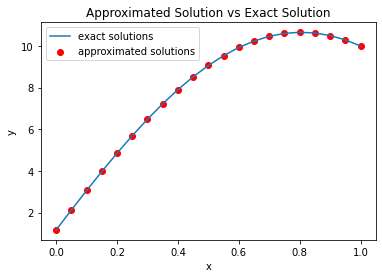

In [7]:
#plot
plt.plot(x,YY,label='exact solutions') #exact sol
plt.scatter(x,yy,color='r',label = 'approximated solutions') #approximation
plt.legend()
plt.ylabel('y')
plt.xlabel('x')
plt.title('Approximated Solution vs Exact Solution')
